# 2.Ustruktureret Datasæt (Tekstdokumenter_Emails)

In [1]:
# Bruges til at læse filer fra mapper
import os  
# Pandas til at lave DataFrame og analysere data
import pandas as pd  
# Til simple grafer
import matplotlib.pyplot as plt 

In [2]:
def load_emails_to_dataframe(folder_path, max_files=100):
    emails = []  # Her gemmer vi vores data som en liste af dictionaries
    for i, filename in enumerate(os.listdir(folder_path)):
        #if filename.endswith(".txt") and i < max_files:
        if i < max_files and os.path.isfile(os.path.join(folder_path, filename)):
            with open(os.path.join(folder_path, filename), 'r', encoding='latin-1') as file:
                raw = file.read()  # Læs hele filens indhold
                lines = raw.split("\n")  # Del indholdet op linje for linje

                # Opret en email-data struktur
                data = {"from": "", "to": "", "subject": "", "body": ""}
                body_lines = []
                body_started = False

                # Gennemgå hver linje og find metadata + body
                for line in lines:
                    if line.lower().startswith("from:"):
                        data["from"] = line[5:].strip()
                    elif line.lower().startswith("to:"):
                        data["to"] = line[3:].strip()
                    elif line.lower().startswith("subject:"):
                        data["subject"] = line[8:].strip()
                    elif line.strip() == "":
                        body_started = True  # Når vi rammer en tom linje → resten er "body"
                    elif body_started:
                        body_lines.append(line.strip())  # Tilføj linje til body

                data["body"] = " ".join(body_lines)  # Saml body til én tekststreng
                emails.append(data)  # Gem hele emailen i listen

    return pd.DataFrame(emails)  # Konverter listen til en DataFrame


In [3]:
# Hent emails
df = load_emails_to_dataframe("emails/", max_files=100)
# Vis de første 5
df.head()

,from,to,subject,body
0,ei_editor@ftenergy.com,einsighthtml@listserv.ftenergy.com,"TVA takes lead in sales, generation by utilities",=20 [IMAGE]=09 [IMAGE] [IMAGE] [IMAGE] [IMAG...
1,arsystem@mailman.enron.com,k..allen@enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...
2,"Jones, Brad","'daniel.mcdonagh@chase.com'; Allen, Phillip K....",Gas P&L by day,Phillip My interpretation of this is that we m...
3,unsubscribe-i@networkpromotion.com,pallen@enron.com,"Too many to chose from - CD player, 2 way Radi...",[IMAGE] Get your FREE* Reward NOW! =09=09[IMAG...
4,louise.kitchen@enron.com,"wes.colwell@enron.com, georgeanne.hodges@enron...",NETCO,The New Year has arrived and we really to fina...


In [7]:
# Her ser vi antal rækker og kolonner
df.shape

(66, 4)

In [9]:
# Her får vi et overblik
df.info

<bound method DataFrame.info of                                              from  \
0                          ei_editor@ftenergy.com   
1                      arsystem@mailman.enron.com   
2                                     Jones, Brad   
3              unsubscribe-i@networkpromotion.com   
4                        louise.kitchen@enron.com   
..                                            ...   
61                           brad.jones@enron.com   
62            subscriptions@intelligencepress.com   
63                 prizemachine@feedback.iwon.com   
64  software@mail02.unitedmarketingstrategies.com   
65                       michelle.akers@enron.com   

                                                   to  \
0                  einsighthtml@listserv.ftenergy.com   
1                                  k..allen@enron.com   
2   'daniel.mcdonagh@chase.com'; Allen, Phillip K....   
3                                    pallen@enron.com   
4   wes.colwell@enron.com, georgeanne.hodges@e

In [11]:
# Her kigger vi på Attributterne/Kolonnerne for kolonnerne
df.columns

Index(['from', 'to', 'subject', 'body'], dtype='object')

In [13]:
# Her kigger vi på Attributterne/Kolonnerne
list(df)

['from', 'to', 'subject', 'body']

In [15]:
# Vi tjekker for manglende værdier i datasættet
df.isna().sum()

from       0
to         0
subject    0
body       0
dtype: int64

In [17]:
# Opretter en ny kolonne 'body_lower' med emailens tekst (body) i små bogstaver,
# så det bliver nemmere at søge efter ord uanset store/små bogstaver
df["body_lower"] = df["body"].str.lower()

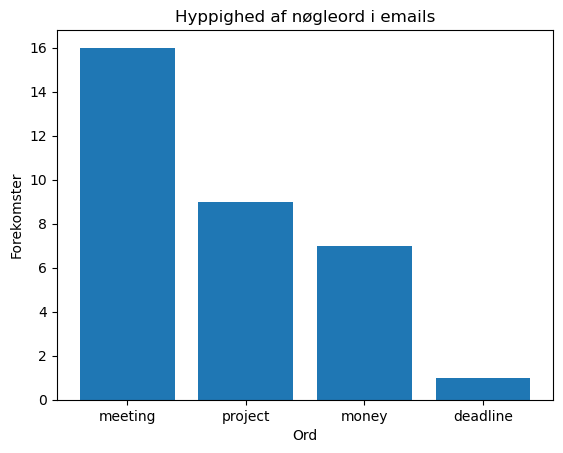

In [19]:
keywords = ["meeting", "project", "money", "deadline"]

# Tæl hvor ofte hvert ord nævnes i body
counts = [df["body_lower"].str.count(word).sum() for word in keywords]

# Lav et simpelt søjlediagram
plt.bar(keywords, counts)
plt.title("Hyppighed af nøgleord i emails")
plt.ylabel("Forekomster")
plt.xlabel("Ord")
plt.show()


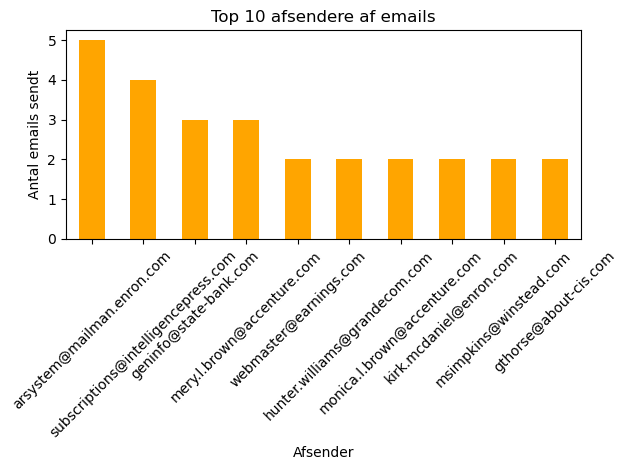

In [21]:
# Tæl hvor mange mails som er modtager fra afsendere 
top_senders = df["from"].value_counts().head(10)

top_senders.plot(kind="bar", color="orange")
plt.title("Top 10 afsendere af emails")
plt.xlabel("Afsender")
plt.ylabel("Antal emails sendt")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


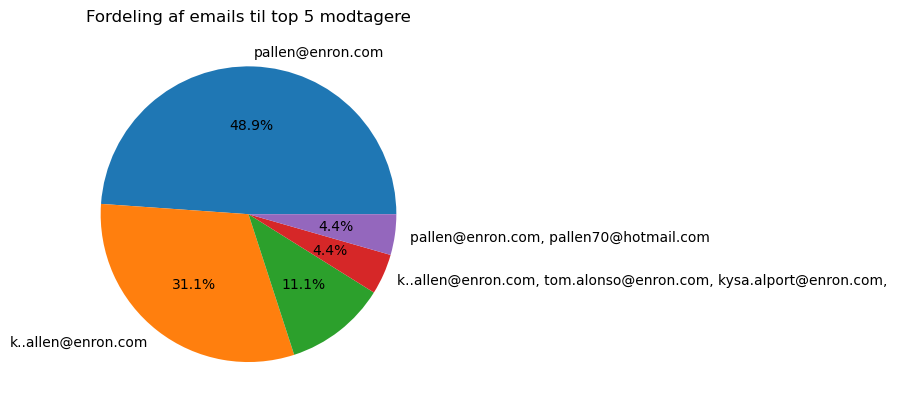

In [23]:
# Tæl top 5 modtagere
top_5 = df["to"].value_counts().head(5)

# Lav et cirkeldiagram (pie chart)
top_5.plot(kind="pie", autopct="%1.1f%%")

# Tilføj titel og fjern y-aksens tekst
plt.title("Fordeling af emails til top 5 modtagere")
plt.ylabel("")  # Fjerner label på y-aksen
plt.show()

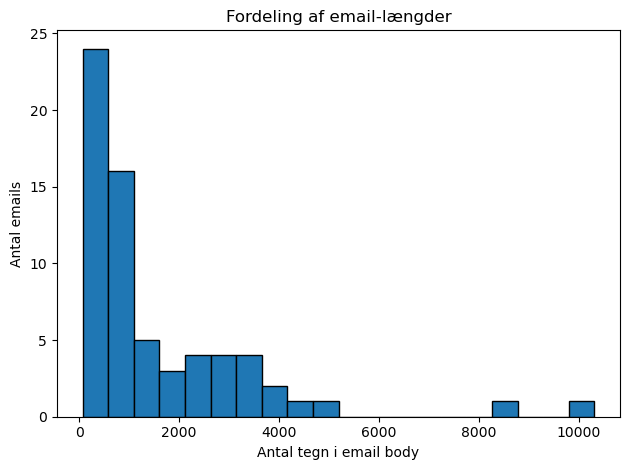

In [25]:
# Lav ny kolonne med længde af 'body' teksten
df["body_length"] = df["body"].str.len()

# Lav histogram over body-længder
plt.hist(df["body_length"], bins=20, edgecolor='black')

# Tilføj titel og akse-labels
plt.title("Fordeling af email-længder")
plt.xlabel("Antal tegn i email body")
plt.ylabel("Antal emails")

# Vis diagrammet
plt.tight_layout()
plt.show()